In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# function to test the correlation between two columns using the corr function
def column_corr (dfname, colA, colB):
    cor_score = dfname[colA].corr(dfname[colB])
    return cor_score   


In [3]:
df = pd.read_excel("input\\CT69.xlsx", sheet_name='Sheet1')
df.columns

Index(['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Category', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Allocation', 'intervention model',
       'masking', 'primary purpose', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Sites number', 'Study Documents', 'URL'],
      dtype='object')

In [4]:
column_corr(df,'Enrollment','Sites number')

0.5804364010112458

In [5]:
df1 = pd.read_excel("input\\katsanos.xlsx", sheet_name = 'Sheet1')
df1.columns

Index(['Trial name', 'Panel talk 1', 'Panel talk 2', 'NCT ID', 'Rank',
       'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results',
       'Conditions', 'Interventions', 'Outcome Measures',
       'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment',
       'Funded Bys', 'Study Type', 'Study Designs', 'Intervation model',
       'masking', 'primary purpose', 'Other IDs', 'Start Date',
       'Primary Completion Date', 'Completion Date', 'First Posted',
       'Results First Posted', 'Last Update Posted', 'Locations',
       'Sites number', 'Study Documents', 'URL'],
      dtype='object')

In [6]:
column_corr(df1,'Enrollment','Sites number')

0.6766638835783707

Below we use python scipy.stats to calculate the regression and p value

In [7]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
def column_corr_p (listA,listB):
    x = listB
    y = listA
    mod = sm.OLS(x,y)
    res = mod.fit()
    predictions = res.predict(listA)
    return res.summary()

In [9]:
df_s = df[['Enrollment','Sites number']]
df_s.dropna()
df_s.shape
df_f = df[df_s['Sites number'] != 0]
df_f.shape

(66, 32)

In [10]:
# use pearson from scipy.stats
from scipy.stats.stats import pearsonr
def column_corr_pear(listA,listB):
    a = pearsonr(listA,listB)
    return a

In [11]:
listA = df_f['Enrollment']
listB = df_f['Sites number']
column_corr_pear(listA,listB)

(0.5685476438259786, 6.357893909757526e-07)

In [44]:
print(pd.__version__)

0.22.0


In [12]:
column_corr_p(listA,listB)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sites number   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     73.20
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           3.01e-12
Time:                        09:41:59   Log-Likelihood:                -266.32
No. Observations:                  66   AIC:                             534.6
Df Residuals:                      65   BIC:                             536.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Enrollment     0.0618      0.007      8.556      0.000       0.047       0.076
==============================================================================
Omnibus:                       26.722   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.009
Skew:                           1.436   Prob(JB):                     6.20e-11
Kurtosis:                       5.974   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sites number  = 0.0618*Enrollment

In [13]:
list1 = df1['Enrollment']
list2 = df1['Sites number']
column_corr_pear(list1,list2)

(0.6766638835783705, 0.001051633604127993)

In [14]:
column_corr_p(list1,list2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sites number   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     29.44
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           3.10e-05
Time:                        09:42:08   Log-Likelihood:                -78.368
No. Observations:                  20   AIC:                             158.7
Df Residuals:                      19   BIC:                             159.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Enrollment     0.0637      0.012      5.426      0.000       0.039       0.088
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                0.378
Skew:                           0.333   Prob(JB):                        0.828
Kurtosis:                       3.102   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# construct a formulla
import statsmodels.formula.api as smf
def column_corr_p_formula (listA, listB):
    df_re = pd.DataFrame()
    df_re['X'] = listB
    df_re['Y'] = listA
    results_formula = smf.ols(formula='Y ~ X', data = df_re).fit()
    return results_formula.params

In [16]:
column_corr_p_formula(listA, listB)

Intercept    153.373307
X              4.214674
dtype: float64

For the CT 69: Enrollment = 153.37 + 4.21*Sites number

In [17]:
column_corr_p_formula(list1, list2)

Intercept    135.869646
X              5.600946
dtype: float64

For Katsanos: Enrollment = 135.87 + 5.6*Sites number

In [18]:
def column_corr_p_formula_nointercept (listA, listB):
    df_re = pd.DataFrame()
    df_re['X'] = listB
    df_re['Y'] = listA
    results_formula_nointercept = smf.ols(formula='Y ~ X - 1', data = df_re).fit()
    return results_formula_nointercept.params

In [19]:
column_corr_p_formula_nointercept(listA, listB)

X    8.57542
dtype: float64

In [20]:
column_corr_p_formula_nointercept(list1, list2)

X    9.537373
dtype: float64

Use the log of enrollment subject number to see if there is a strong correlation with the sites number.

In [25]:
listA_log = np.log(listA)

In [27]:
column_corr_p(listA_log,listB)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sites number   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     38.61
Date:                Mon, 13 Jan 2020   Prob (F-statistic):           4.13e-08
Time:                        09:54:20   Log-Likelihood:                -275.82
No. Observations:                  66   AIC:                             553.6
Df Residuals:                      65   BIC:                             555.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Enrollment     2.3633      0.380      6.214      0.000       1.604       3.123
==============================================================================
Omnibus:                       46.998   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.746
Skew:                           2.326   Prob(JB):                     5.50e-30
Kurtosis:                       8.230   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
column_corr_pear(listA_log,listA)

(0.9509812848649039, 2.5001691659534144e-34)

In [29]:
list1_log = np.log(list1)
column_corr_pear(list1_log, list2)

(0.6015094473747192, 0.005022680065324338)

In [30]:
column_corr_p(list1_log,list2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sites number   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     11.92
Date:                Mon, 13 Jan 2020   Prob (F-statistic):            0.00267
Time:                        09:56:18   Log-Likelihood:                -82.858
No. Observations:                  20   AIC:                             167.7
Df Residuals:                      19   BIC:                             168.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Enrollment     2.3600      0.684      3.452      0.003       0.929       3.791
==============================================================================
Omnibus:                       15.468   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.038
Skew:                           1.810   Prob(JB):                     0.000895
Kurtosis:                       4.934   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
import seaborn as sns

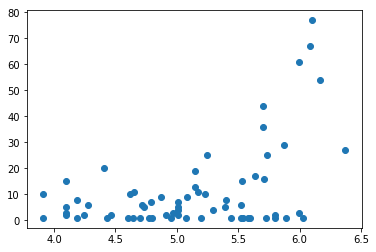

In [35]:
plt.scatter(x=listA_log, y = listB)

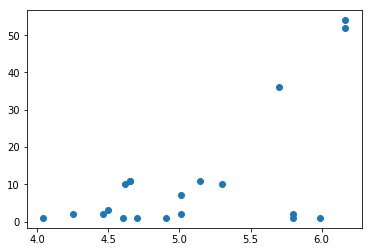

In [36]:
plt.scatter(x=list1_log, y = list2)